## CLUSTERING ANALYSIS 

### Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [36]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [38]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [42]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Data Preprocessing:

In [45]:
# Handle missing values
data.dropna(inplace=True)

In [47]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [53]:
#Fill or drop missing values (choosing median imputation)
data.fillna(data.median(), inplace=True)

In [59]:
# Detect and remove outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [63]:
# Removing outliers
data1 = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [65]:
# Standardize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

print("Data preprocessing complete. Remaining rows:", df_scaled.shape[0])

Data preprocessing complete. Remaining rows: 2875


### Perform exploratory data analysis (EDA) 

In [68]:
#This includes visualizing distributions, correlations, and outliers.

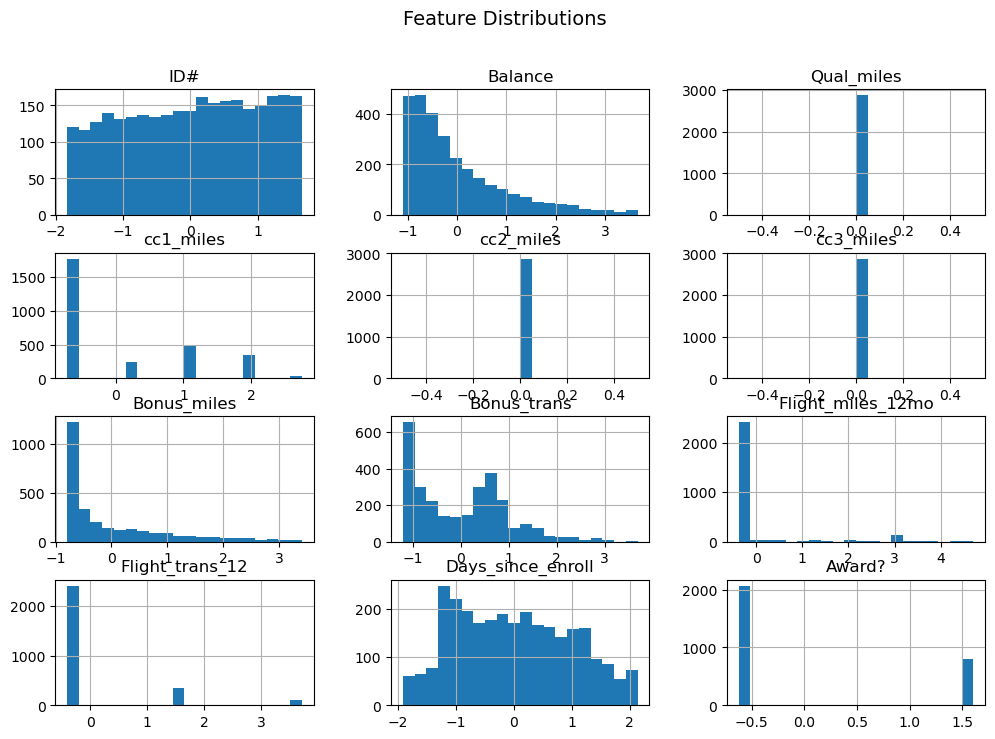

In [70]:
# Visualizing distributions
df_scaled.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

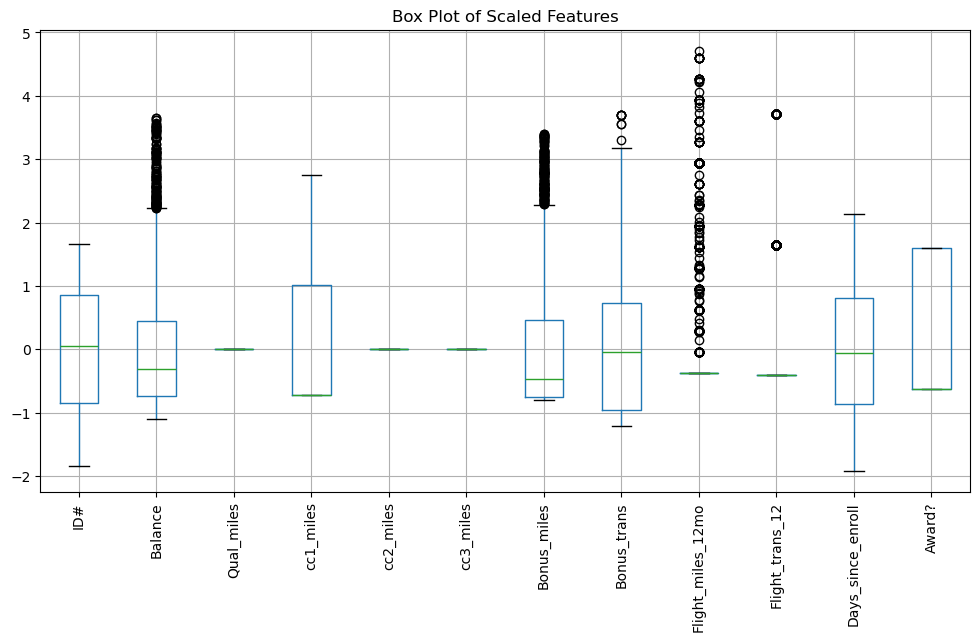

In [72]:
# Boxplot to check outliers
plt.figure(figsize=(12, 6))
df_scaled.boxplot()
plt.xticks(rotation=90)
plt.title("Box Plot of Scaled Features")
plt.show()

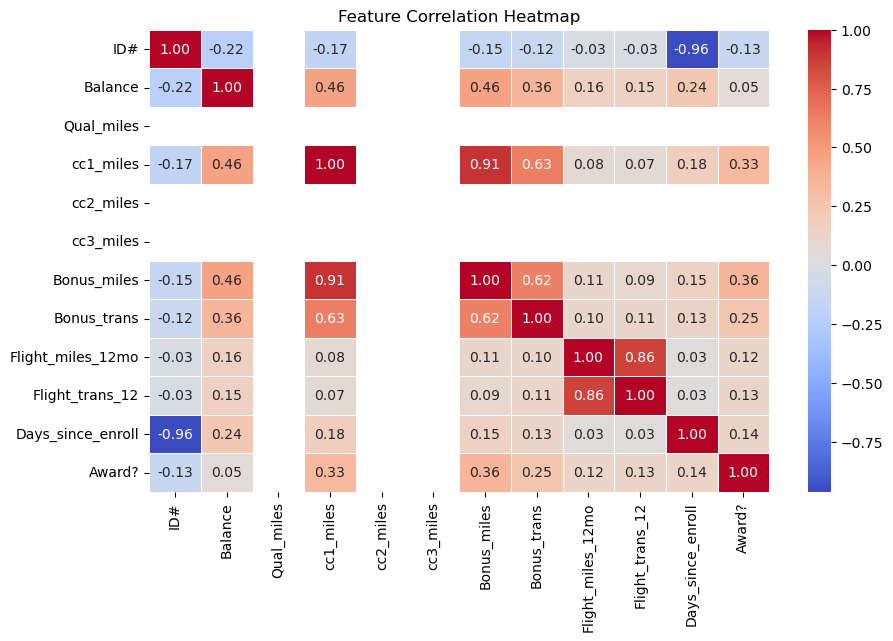

In [74]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Implementing Clustering Algorithms:

### K-Means Clustering

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
# Determine optimal K using Elbow method
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

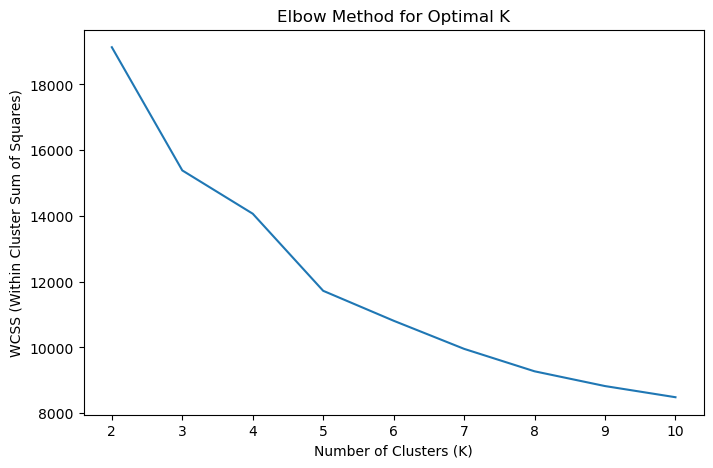

In [83]:
# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [87]:
#Run K-Means with Optimal K and Evaluate Using Silhouette Score:

optimal_k = 4  # Choose based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

In [89]:
# Compute Silhouette Score

silhouette_avg = silhouette_score(df_scaled, df_scaled["Cluster_KMeans"])
print(f"Silhouette Score for K-Means: {silhouette_avg}")

Silhouette Score for K-Means: 0.34001225444668404


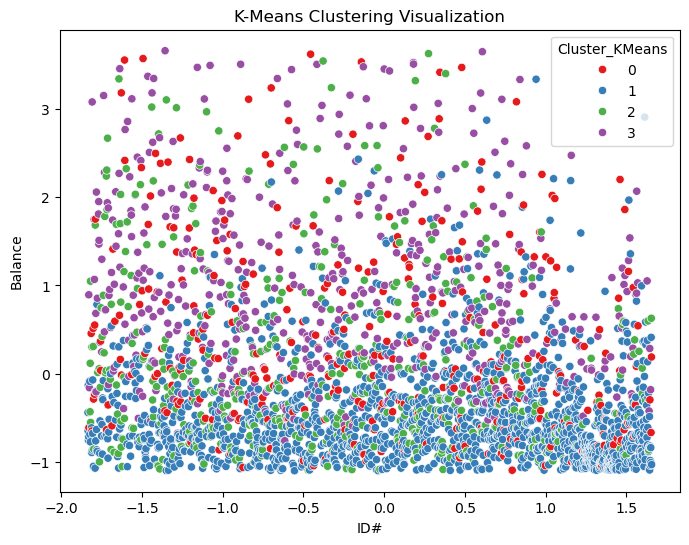

In [91]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled["Cluster_KMeans"], palette="Set1")
plt.title("K-Means Clustering Visualization")
plt.show()

### Hierarchical Clustering

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [98]:
#Plot the Dendrogram to determine optimal clusters.

# Compute the linkage matrix
linked = linkage(df_scaled, method='ward')

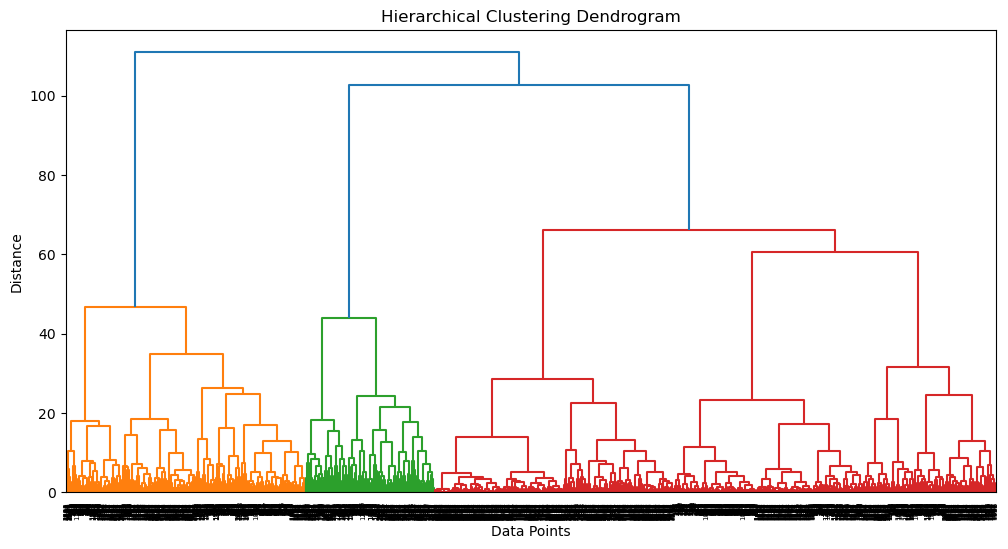

In [100]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [102]:
#Apply Hierarchical Clustering:

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [106]:
# Assign number of clusters based on dendrogram
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_scaled["Cluster_Hierarchical"] = hierarchical.fit_predict(df_scaled)

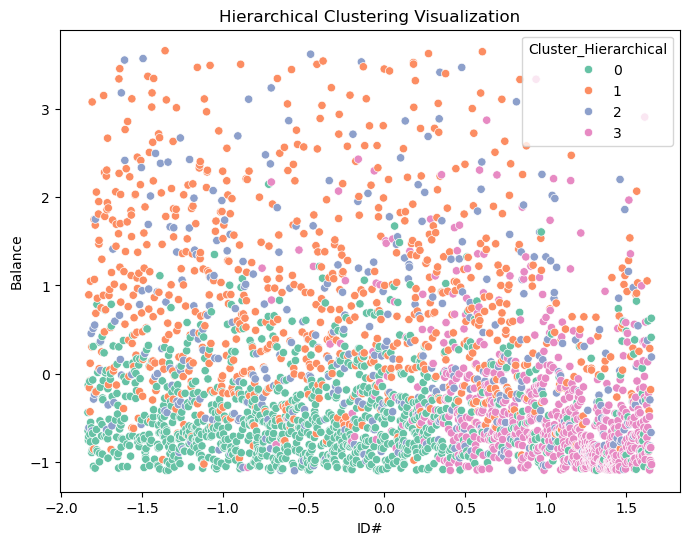

In [108]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled["Cluster_Hierarchical"], palette="Set2")
plt.title("Hierarchical Clustering Visualization")
plt.show()

### DBSCAN Clustering:

In [115]:
# Apply DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

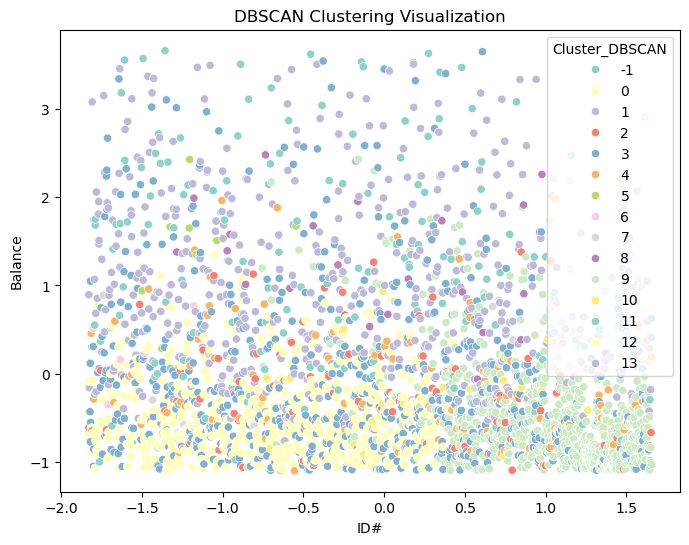

In [119]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled["Cluster_DBSCAN"], palette="Set3")
plt.title("DBSCAN Clustering Visualization")
plt.show()

In [121]:
# Count noise points (-1 means noise)
print("Number of noise points:", (df_scaled["Cluster_DBSCAN"] == -1).sum())

Number of noise points: 166


In [125]:
#Compare the clustering results:
print("K-Means Clusters:\n", df_scaled["Cluster_KMeans"].value_counts())
print("\nHierarchical Clusters:\n", df_scaled["Cluster_Hierarchical"].value_counts())
print("\nDBSCAN Clusters:\n", df_scaled["Cluster_DBSCAN"].value_counts())

K-Means Clusters:
 Cluster_KMeans
1    1551
3     520
2     460
0     344
Name: count, dtype: int64

Hierarchical Clusters:
 Cluster_Hierarchical
0    997
1    741
3    739
2    398
Name: count, dtype: int64

DBSCAN Clusters:
 Cluster_DBSCAN
 9     727
 0     588
 3     587
 1     489
-1     166
 4     114
 2      89
 8      28
 10     28
 7      17
 11     12
 13     12
 5       8
 6       5
 12      5
Name: count, dtype: int64


In [127]:
# Compute silhouette scores for comparison
silhouette_kmeans = silhouette_score(df_scaled, df_scaled["Cluster_KMeans"])
silhouette_hierarchical = silhouette_score(df_scaled, df_scaled["Cluster_Hierarchical"])

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical: {silhouette_hierarchical}")

Silhouette Score for K-Means: 0.1356977679969179
Silhouette Score for Hierarchical: 0.3762068935353089
